# Gradient descent for logistic regression: Implementation in Python

### Importing necessary libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris 

### Loading the dataset

In [8]:
X,y = load_iris(return_X_y=True)

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Note that there are 3 classes. Iris Setosa is coded as 0, Iris Versicolor is coded as 1 and Iris virginica is coded as 2.

### Binarize the data (Setosa:0 and non-setosa:1)

This is for binary classification. non-setosa means both versicolor and virginica.

In [9]:
y_mod = y.copy()
y_mod[y_mod == 2] = 1

In [10]:
y_mod

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Define the function to compute cost
Input : There are two inputs

- y_predict : A vector of predicted outputs  and  
- y_actual  : A vector of True Labels
        
Output: Binary Cross-entropy loss which is defined as following.

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log{h_{\theta} \left(\textbf{x}^{(i)} \right)} + \left (1 - y^{(i)} \right) \left( 1-\log{h_{\theta} \left(\textbf{x}^{(i)}\right)} \right) \right] $$

In [11]:
def compute_cost(y_predict, y_actual):
    
    assert (y_actual.shape[0] == y_predict.shape[0]),"Dimension Mismatch"
    
    m = y_predict.shape[0]
    cost = 0
    
    for i in range(m):
        cost += (-1)*((y_actual[i] * np.log(y_predict[i])) + ((1-y_actual[i]) * np.log(1-y_predict[i])))
    
    cost = cost/m
    return cost    

### Defining the function to compute the output of the hypothesis function

In [12]:
def output_lr(theta, X):
    
    z = X @ theta
    op = 1/(1+np.exp((-1)*z))   # Logistic output 
    return op

### Gradient Descent algorithm for Logistic Regression

$$ \theta_j (t+1) := \theta_j (t) - \frac{\alpha}{m} \sum_{i=1}^{m} \left( h_{\theta} \left( \textbf{x}^{(i)} \right) - y^{(i)}  \right) x_j^{(i)} ~~; ~~ j = 0, 1, 2, ... , k $$

In [13]:
def grad_des_log_reg(X_train, y_train, alpha = 0.01, it = 1000, tol = 0.0001):
    
    assert (X_train.shape[0] == y_train.shape[0]), "Dimension Mismatch"
    
    m = X_train.shape[0]
    X_train = np.column_stack((np.ones(m),X_train))
    k = X_train.shape[1]
    
    np.random.seed(32)
    theta = np.random.random(k)
    costs = []
    count = 1
    
    for i in range(it):
        y_pred = output_lr(theta, X_train)
        J = compute_cost(y_pred, y_train)
        costs.append(J)
        del_theta = (-1)*(alpha/m)*(X_train.T @ (y_pred - y_train))
        theta += del_theta
        if np.linalg.norm(del_theta) <= tol:
            break
        count += 1
    
    return theta, costs, count

### Defining function for predicting the class

In [14]:
def predict(X_test, theta):
    
    m = X_test.shape[0]
    X_test = np.column_stack((np.ones(m), X_test))
    op = output_lr(theta, X_test)
    op[op >= 0.5] = 1
    op[op < 0.5] = 0
    return op

### Checking how the gradient descent works

In [15]:
theta, cost, count = grad_des_log_reg(X,y_mod,alpha = 0.01, it = 500, tol = 0.0001)

In [16]:
print("theta: {}, \n count = {}".format(theta, count))

theta: [ 0.61165388 -0.61828081 -0.42862953  1.26652692  0.94477727], 
 count = 501


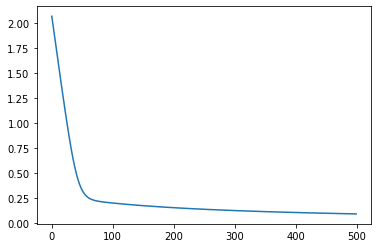

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost)
plt.show()

### Train test split of the dataset

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_mod, test_size = 0.2,
                                                   shuffle = True)

In [22]:
X_train.shape[0]

120

In [23]:
X_test.shape[0]

30

### Estimate model parameters using Training dataset

In [24]:
theta, cost, count = grad_des_log_reg(X_train,y_train)

### Predicting the output on test dataset

In [25]:
y_pred = predict(X_test, theta)

### Function to generate Confusion Matrix

In [26]:
def conf_matrix (y_pred, y_act, n_classes = 2):
    
    cm = np.zeros((n_classes,n_classes))
    for i in range(y_pred.shape[0]):
        cm[int(y_act[i]),int(y_pred[i])]+=1
    
    return cm

In [27]:
conf_mat = conf_matrix(y_pred,y_test)

In [24]:
conf_mat

array([[12.,  0.],
       [ 0., 18.]])

### Printing accuracy on test dataset

In [28]:
accuracy = np.trace(conf_mat)/np.sum(conf_mat)
print("Accuracy = {}%".format(accuracy*100))

Accuracy = 100.0%
